# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
X = df.drop('Class', axis =1)
y = df['Class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
sum(y == 1), sum(y == 0)

(492, 284315)

In [18]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

Log_reg:

In [ ]:
mod1 = LogisticRegression()
mod1.fit(X_train, y_train)
y_pred11 = mod1.predict_proba(X_test)
y_pred1 = mod1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1), recall_score(y_test, y_pred1), f1_score(y_test, y_pred1), roc_auc_score(y_test, y_pred11[:, 1])

(0.9992451107756047,
 0.8245614035087719,
 0.5875,
 0.6861313868613139,
 0.9661876780000703)

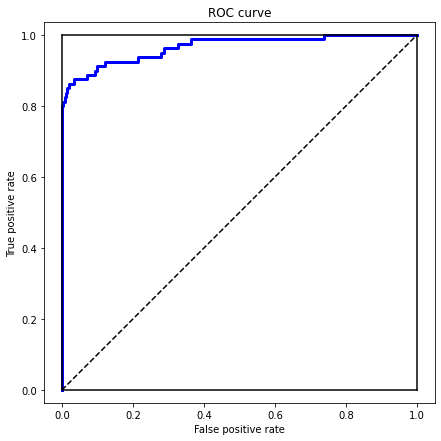

In [ ]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred11[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

KNN:

In [ ]:
mod2 = KNeighborsClassifier()
mod2.fit(X_train, y_train)
y_pred2 = mod2.predict_proba(X_test)
y_pred2_1 = mod2.predict(X_test)

In [ ]:
y_pred2[:, 1], y_pred2_1

(array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
accuracy_score(y_test, y_pred2_1), precision_score(y_test, y_pred2_1), recall_score(y_test, y_pred2_1), f1_score(y_test, y_pred2_1), roc_auc_score(y_test, y_pred2[:, 1])

(0.9994733330992591,
 0.9032258064516129,
 0.7,
 0.7887323943661972,
 0.8873430962343095)

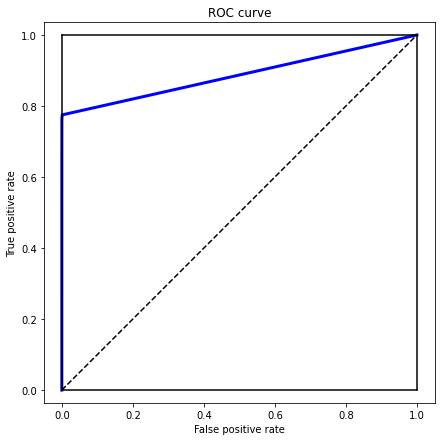

In [ ]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred2[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

Константный:

In [ ]:
y_pred3_1 = np.zeros(len(y_test))
y_pred3 = y_pred3_1.astype(int)

In [ ]:
accuracy_score(y_test, y_pred3), precision_score(y_test, y_pred3), recall_score(y_test, y_pred3), f1_score(y_test, y_pred3), roc_auc_score(y_test, y_pred3_1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9985955549313578, 0.0, 0.0, 0.0, 0.5)

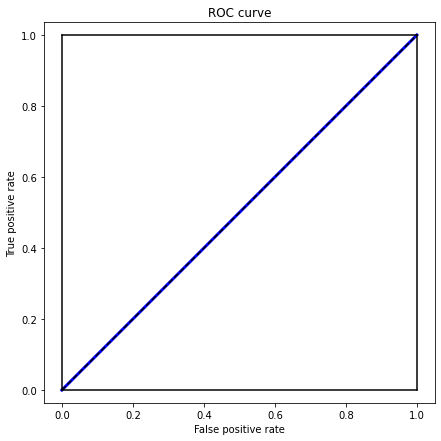

In [ ]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred3_1)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

**т.к. мы хотим максимально обезопасить транзакции клиентов (хотим же?), то нам нужно максимизировать полноту выявленных случаев мошенничества => увеличиваем recall. Если наша модель будет немного чаще промахиваться, и браковать нормальные транзакции, то это не так страшно, как упустить попытку мошенничества.**

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [20]:
def fitting(model, X, y, score, cv=5, proba = False):
  kf = KFold(n_splits=cv)
  kf.get_n_splits(X)
  res = []
  for train_ind, test_ind in kf.split(X):
    model.fit(X[train_ind], y[train_ind])
    if proba:
      res.append(score(y[test_ind], model.predict_proba(X[test_ind])[:, 1]))
    else:
      res.append(score(y[test_ind], model.predict(X[test_ind])))
  return res

In [ ]:
weight = np.arange(100, 1201, 100)
recall_lst_w = []
roc_auc_lst_w = []
for val in  weight:
  t =fitting(LogisticRegression(class_weight={0:1, 1:val}), X_scaled, y, recall_score)
  recall_lst_w.append(np.mean(t))
  roc_auc_lst_w.append(np.mean(fitting(LogisticRegression(class_weight={0:1, 1:val}), X_scaled, y, roc_auc_score, proba=True)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


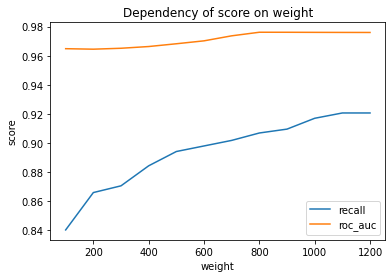

In [ ]:
plt.plot(weight, recall_lst_w)
plt.plot(weight, roc_auc_lst_w)
plt.legend(['recall', 'roc_auc'])
plt.xlabel('weight')
plt.ylabel('score')
plt.title('Dependency of score on weight')
plt.show()

In [ ]:
C = np.arange(1, 100, 10)
recall_lst_C = []
roc_auc_lst_C = []
for val in  C:
  t =fitting(LogisticRegression(C = val), X_scaled, y, recall_score)
  recall_lst_C.append(np.mean(t))
  roc_auc_lst_C.append(np.mean(fitting(LogisticRegression(class_weight={0:1, 1:val}), X_scaled, y, roc_auc_score, proba=True)))

[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]
[0.7961783439490446, 0.36904761904761907, 0.6134453781512605, 0.47368421052631576, 0.56]


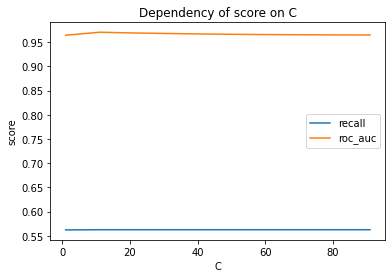

In [ ]:
plt.plot(C, np.array(recall_lst_C))
plt.plot(C, np.array(roc_auc_lst_C))
plt.legend(['recall', 'roc_auc'])
plt.xlabel('C')
plt.ylabel('score')
plt.title('Dependency of score on C')
plt.show()

In [ ]:
max_iter = np.arange(300, 1001, 100)
recall_lst_mi = []
roc_auc_lst_mi = []
for val in max_iter:
  t= fitting(LogisticRegression(max_iter = val), X_scaled, y, recall_score)
  recall_lst_mi.append(np.mean(t))
  roc_auc_lst_mi.append(np.mean(fitting(LogisticRegression(max_iter=val), X_scaled, y, roc_auc_score, proba = True)))


[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]
[0.802547770700637, 0.36904761904761907, 0.6050420168067226, 0.47368421052631576, 0.56]


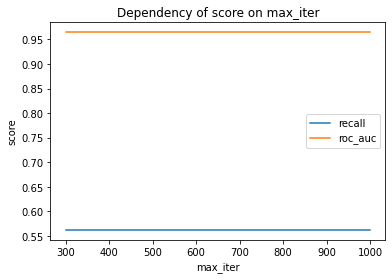

In [ ]:
plt.plot(max_iter, np.array(recall_lst_mi))
plt.plot(max_iter, np.array(roc_auc_lst_mi))
plt.legend(['recall', 'roc_auc'])
plt.xlabel('max_iter')
plt.ylabel('score')
plt.title('Dependency of score on max_iter')
plt.show()

In [ ]:
lr = np.arange(0.00005, 0.00016, 0.00002)
recall_lst_lr = []
roc_auc_lst_lr = []
for val in lr:
  t= fitting(LogisticRegression(tol = val), X_scaled, y, recall_score)
  recall_lst_lr.append(np.mean(t))
  roc_auc_lst_lr.append(np.mean(fitting(LogisticRegression(tol = val), X_scaled, y, roc_auc_score, proba = True)))

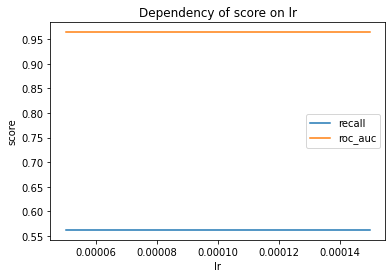

In [ ]:
plt.plot(lr, np.array(recall_lst_lr))
plt.plot(lr, np.array(roc_auc_lst_lr))
plt.legend(['recall', 'roc_auc'])
plt.xlabel('lr')
plt.ylabel('score')
plt.title('Dependency of score on lr')
plt.show()

In [33]:
recall_best, mi_best, C_best, roc_auc_best, weight_best = 0, 0, 0, 0, 0
weight1 = np.arange(100, 1201, 100)
C1 = np.arange(1, 100, 40)
max_iter1 = np.arange(300, 1001, 200)
for i in weight1:
  for j in max_iter1:
    for k in C1:
      t = np.mean(fitting(LogisticRegression(class_weight = {0:1, 1:i}, max_iter = j, C = k), X_scaled, y, recall_score))
      if t > recall_best:
        recall_best = t
        roc_auc_best = np.mean(fitting(LogisticRegression(class_weight={0:1, 1:i}, max_iter = j, C = k), X_scaled, y, roc_auc_score, proba = True))
        mi_best = j
        weight_best = i
        C_best = k

In [ ]:
weight_best, recall_best, mi_best, C_best, roc_auc_best

(1100, 0.9206176775772328, 300, 1, 0.9760174904342737)

In [ ]:
best_model = LogisticRegression(class_weight = {0:1, 1:weight_best}, max_iter = mi_best, C= C_best)
best_model.fit(X_scaled, y)

LogisticRegression(C=1, class_weight={0: 1, 1: 1100}, max_iter=300)

KNN:

In [ ]:
ns = np.arange(2, 15, 3)
recall_lst_ns = []
roc_auc_lst_ns = []
for i in ns:
  recall_lst_ns.append(np.mean(fitting(KNeighborsClassifier(n_neighbors=i), X_scaled, y, recall_score)))
  roc_auc_lst_ns.append(np.mean(fitting(KNeighborsClassifier(n_neighbors=i), X_scaled, y, roc_auc_score, proba=True)))

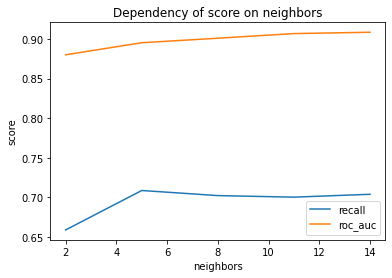

In [ ]:
plt.plot(ns, np.array(recall_lst_ns))
plt.plot(ns, np.array(roc_auc_lst_ns))
plt.legend(['recall', 'roc_auc'])
plt.xlabel('neighbors')
plt.ylabel('score')
plt.title('Dependency of score on neighbors')
plt.show()

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_mobile.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Очень сбалансированный датасет

In [5]:
X1 = np.array(data.drop('price_range', axis=1))
y1 = np.array(data['price_range'])


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [6]:
def fitting_v2(model, X, y, score, cv=5, mode = None):
  kf = KFold(n_splits=cv)
  kf.get_n_splits(X)
  sc = StandardScaler()
  res = []
  for train_ind, test_ind in kf.split(X):
    X_sc_tr = sc.fit_transform(X[train_ind])
    X_sc_tt = sc.transform(X[test_ind])
    model.fit(X_sc_tr, y[train_ind])
    if mode != None:
      res.append(score(y[test_ind], model.predict(X_sc_tt), average = mode))
    else:
      res.append(score(y[test_ind], model.predict(X_sc_tt)))
  return np.mean(res)

LogisticRegression:

In [ ]:
print('accuracy: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, accuracy_score))
print('recall_macro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, recall_score, mode = 'macro'))
print('recall_micro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, recall_score, mode = 'micro'))
print('precision_macro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, precision_score, mode = 'macro'))
print('precision_micro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, precision_score, mode = 'micro'))
print('f1_macro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, f1_score, mode = 'macro'))
print('f1_micro: ', fitting_v2(LogisticRegression(max_iter = 10000), X1, y1, f1_score, mode = 'micro'))

accuracy:  0.9625
recall_macro:  0.9625776068946742
recall_micro:  0.9625
precision_macro:  0.9625876425558454
precision_micro:  0.9625
f1_macro:  0.9624593733357292
f1_micro:  0.9625


KNN:

In [ ]:
print('accuracy: ', fitting_v2(KNeighborsClassifier(), X1, y1, accuracy_score))
print('recall_macro: ', fitting_v2(KNeighborsClassifier(), X1, y1, recall_score, mode = 'macro'))
print('recall_micro: ', fitting_v2(KNeighborsClassifier(), X1, y1, recall_score, mode = 'micro'))
print('precision_macro: ', fitting_v2(KNeighborsClassifier(), X1, y1, precision_score, mode = 'macro'))
print('precision_micro: ', fitting_v2(KNeighborsClassifier(), X1, y1, precision_score, mode = 'micro'))
print('f1_macro: ', fitting_v2(KNeighborsClassifier(), X1, y1, f1_score, mode = 'macro'))
print('f1_micro: ', fitting_v2(KNeighborsClassifier(), X1, y1, f1_score, mode = 'micro'))

accuracy:  0.504
recall_macro:  0.5050068429254664
recall_micro:  0.504
precision_macro:  0.5210534632403123
precision_micro:  0.504
f1_macro:  0.5044815511689251
f1_micro:  0.504


Constate:

In [ ]:
class Constmodel():
  def __init__(self, clss = 0):
    self.cl = clss
  

  def fit(self, X, y):
    pass
  

  def predict(self, X):
    return np.ones(X.shape[0]) + self.cl

Создал класс, чтобы использовать мою функцию, и не писать руками print('accuracy_score' ...) e.t.c.

In [ ]:
print('accuracy: ', fitting_v2(Constmodel(), X1, y1, accuracy_score))
print('recall_macro: ', fitting_v2(Constmodel(), X1, y1, recall_score, mode = 'macro'))
print('recall_micro: ', fitting_v2(Constmodel(), X1, y1, recall_score, mode = 'micro'))
print('precision_macro: ', fitting_v2(Constmodel(), X1, y1, precision_score, mode = 'macro'))
print('precision_micro: ', fitting_v2(Constmodel(), X1, y1, precision_score, mode = 'micro'))
print('f1_macro: ', fitting_v2(Constmodel(), X1, y1, f1_score, mode = 'macro'))
print('f1_micro: ', fitting_v2(Constmodel(), X1, y1, f1_score, mode = 'micro'))

accuracy:  0.25
recall_macro:  0.25
recall_micro:  0.25
precision_macro:  0.0625
precision_micro:  0.25
f1_macro:  0.09988948201537336
f1_micro:  0.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Как видно по метрикам, константный предсказатель здесь не роляет от слова совсем.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

**Так как в этом датасете важны как точность, так и полнота предсказаний, то я возьму f1 меру.**

In [ ]:
mi = np.arange(1000, 10000, 1000)
f1_mi = []
for i in mi:
  f1_mi.append(fitting_v2(LogisticRegression(max_iter = i), X1, y1, f1_score, mode = 'macro'))

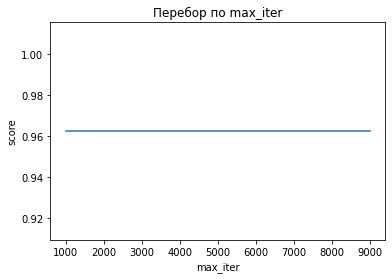

In [ ]:
plt.plot(mi, f1_mi)
plt.xlabel('max_iter')
plt.ylabel('score')
plt.title('Перебор по max_iter')
plt.show()

In [ ]:
C1 = np.arange(1, 100, 30)
f1_C1 = []
for i in C1:
  f1_C1.append(fitting_v2(LogisticRegression(C = i, max_iter = 10000), X1, y1, f1_score, mode = 'macro'))

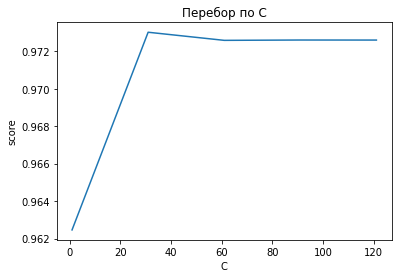

In [ ]:
plt.plot(C1, f1_C1)
plt.xlabel('C')
plt.ylabel('score')
plt.title('Перебор по C')
plt.show()

Перебор по весам классов, С, max_iter (по понятным причинам, график показать не могу):

In [9]:
cl_wt = np.arange(1, 6)
C1_n = np.arange(1, 100, 30)
mi_n = np.arange(10000, 15001, 3000)
f1_max = 0
for w1 in cl_wt:
  for w2 in cl_wt:
    for w3 in cl_wt:
      for w4 in cl_wt:
        for i in C1_n:
          for j in mi_n:
            tmp = fitting_v2(LogisticRegression(class_weight = {0:w1, 1:w2, 2:w3, 3:w4}, max_iter = j, C = i), X1, y1, f1_score, mode = 'macro')
            if tmp > f1_max:
              w1_best = w1
              w2_best = w2
              w3_best = w3
              w4_best = w4
              C_best = i
              mi_best = j
              f1_max = tmp

In [10]:
f1_max

0.9760644013550639

Теперь для KNN:

In [11]:
ns1 = np.arange(2, 17, 3)
f1_ns = []
for i in ns1:
  f1_ns.append(fitting_v2(KNeighborsClassifier(n_neighbors=i), X1, y1, f1_score, mode = 'macro'))

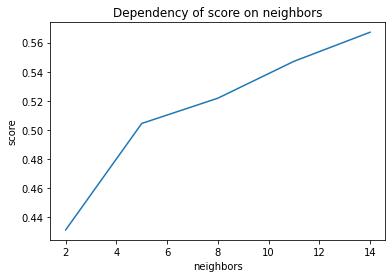

In [12]:
plt.plot(ns1, f1_ns)
plt.xlabel('neighbors')
plt.ylabel('score')
plt.title('Dependency of score on neighbors')
plt.show()